In [159]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [160]:
data = pd.read_csv('confirmed_global.csv', index_col='Country/Region')

In [161]:
data.drop(columns = ['Province/State', 'Lat', 'Long'], inplace=True)

In [162]:
data = data.groupby(level=0).sum()

In [163]:
colunas = data.T.max().sort_values(ascending=False)[:10].index
colunas

Index(['US', 'Russia', 'United Kingdom', 'Brazil', 'Spain', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran'],
      dtype='object', name='Country/Region')

In [164]:
data= data.T

In [165]:
data.index = pd.to_datetime(data.index)

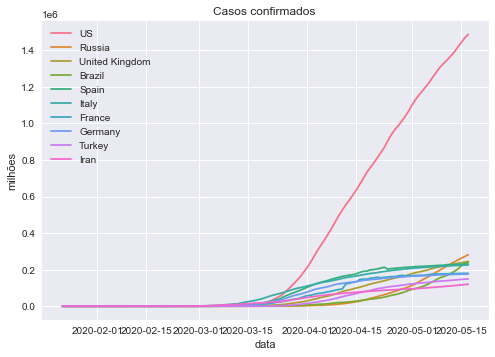

In [171]:
sns.dark_palette("palegreen", as_cmap=True)
sns.lineplot(data = data[colunas], dashes=None)
# plt.xticks(plt.xticks()[0], data.index, rotation=90)
plt.title('Casos confirmados ')
plt.ylabel('milhões')
plt.xlabel('data')
plt.show()

Text(0, 0.5, 'casos confirmados')

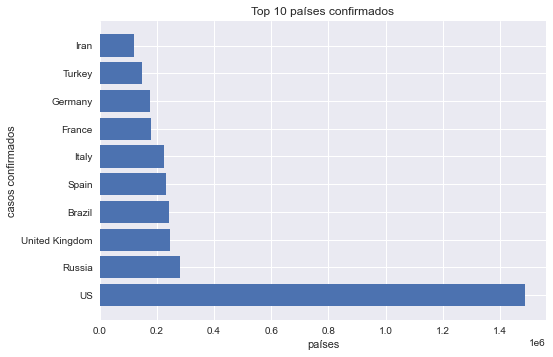

In [9]:
plt.barh(data.loc['5/17/20',colunas].index, data.loc['5/17/20',colunas].values, align='center')
plt.title('Top 10 países confirmados')
plt.xlabel('países')
plt.ylabel('casos confirmados')

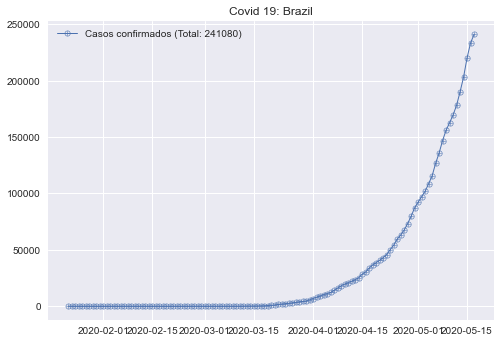

In [10]:
plt.plot(data[['Brazil']], 'o-',marker='$\\bigoplus$', linewidth=1,markersize=6, label='Casos confirmados (Total: '+str(data[['Brazil']].max()[0])+')')
# plt.plot(df[['Brazil']], 'r-',marker='$\\bigoplus$', linewidth=1,markersize=6, label='Óbitos (Total: '+str(df[['Brazil']].max()[0])+')')

plt.title('Covid 19: Brazil')
plt.legend()

Text(0.5, 1.0, 'Casos ao redor do mundo')

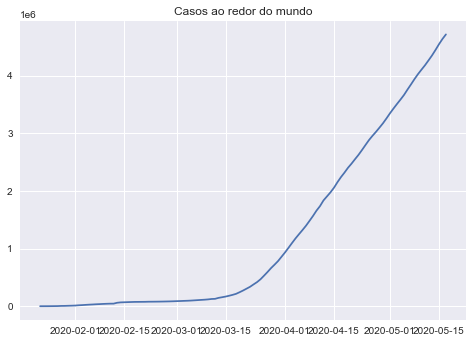

In [11]:
plt.plot(data.T.sum())
plt.title('Casos ao redor do mundo')

Text(0.5, 1.0, 'Casos notificados diariamente')

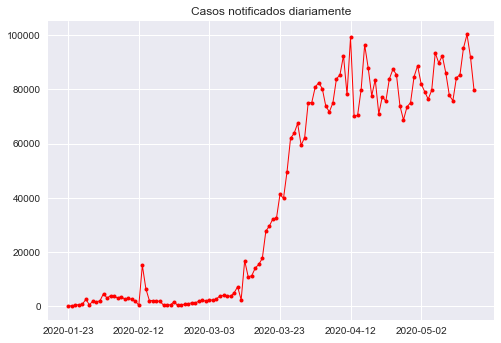

In [183]:
plt.plot(data.T.sum()[1:].values - data.T.sum()[:-1].values, 'ro-', markersize=4, linewidth=1)
plt.xticks(np.arange(len(data)-1)[::20], [i.date() for i in data.index[1:]][::20])
plt.title('Casos notificados diariamente')

In [13]:
df = pd.read_excel('HIST_PAINEL_COVIDBR_20200517.xlsx', index_col='data')

In [43]:
df = df[df['populacaoTCU2019'].isnull() == False]

In [44]:
df.index = pd.to_datetime(df.index)

In [47]:
df.sort_index(inplace=True)

In [129]:
pa_pe = pd.concat([df[(df['estado'] == 'SP') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'PE') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'CE') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'RJ') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'AM') &(df['municipio'].isnull())]['casosAcumulado']],  axis = 1, keys= ['SP', 'PE', 'CE', 'RJ', 'AM'])#.sort_index()

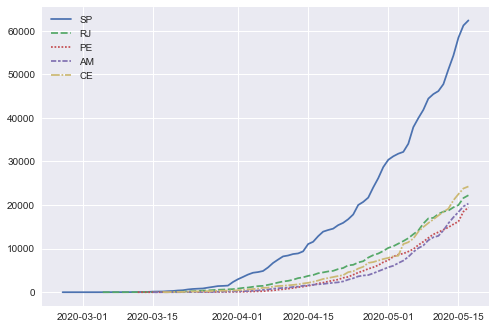

In [145]:
data = pd.DataFrame()
estados = ['SP', 'RJ', 'PE', 'AM', 'CE']
for i in estados:
    data = pd.concat([data, df[(df['estado'] == i) &(df['municipio'].isnull())]['casosAcumulado']],  axis = 1)
data.columns = estados
sns.lineplot(data = data)

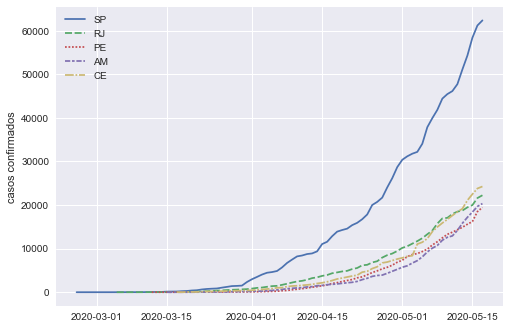

In [144]:
sns.lineplot(data = data)#.sort_index()
plt.ylabel('casos confirmados')
plt.title('')
plt.show()

In [111]:
pa_pe = pd.concat([df[(df['estado'] == 'GO') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'TO') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'RR') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'MT') &(df['municipio'].isnull())]['casosAcumulado'], df[(df['estado'] == 'MS') &(df['municipio'].isnull())]['casosAcumulado']],  axis = 1, keys= ['GO', 'TO', 'RR', 'MT', 'MS'])#.sort_index()

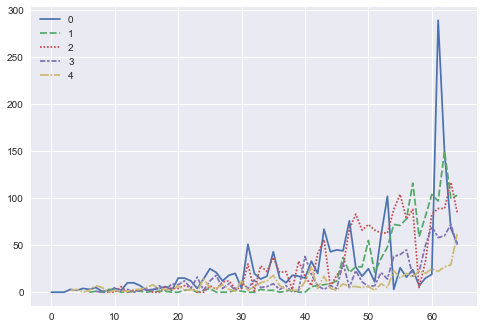

In [114]:
sns.lineplot(data = pa_pe.values[1:] - pa_pe.values[:-1])
# plt.xticks(plt.xticks()[0][::10], pa_pe.index[::10])
plt.show()

In [50]:
top = df.loc['2020-05-17'][df.loc['2020-05-17']['municipio'].isnull()].sort_values(by='casosAcumulado', ascending=False)[['estado','casosAcumulado']][1:]
top

,estado,casosAcumulado
data,,
2020-05-17,SP,62345
2020-05-17,CE,24255
2020-05-17,RJ,22238
2020-05-17,AM,20328
2020-05-17,PE,19452
2020-05-17,PA,13864
2020-05-17,MA,12492
2020-05-17,BA,8443
2020-05-17,ES,6744


Text(0.5, 1.0, 'Top 10 estados com casos confirmados')

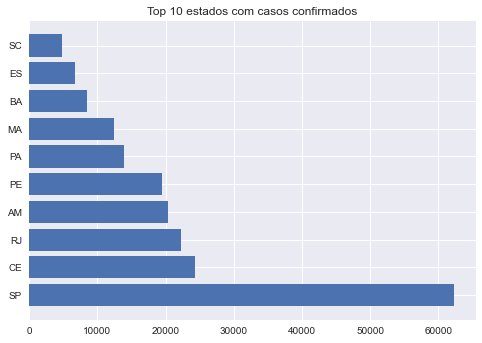

In [123]:
plt.barh(top['estado'].values[:10], top['casosAcumulado'].values[:10], align='center')
plt.title('Top 10 estados com casos confirmados')
# plt.xlabel('países')
# plt.ylabel('casos confirmados')

In [94]:
sum(top['casosAcumulado'].values[:5])/sum(top['casosAcumulado'].values)

0.6164675626348101

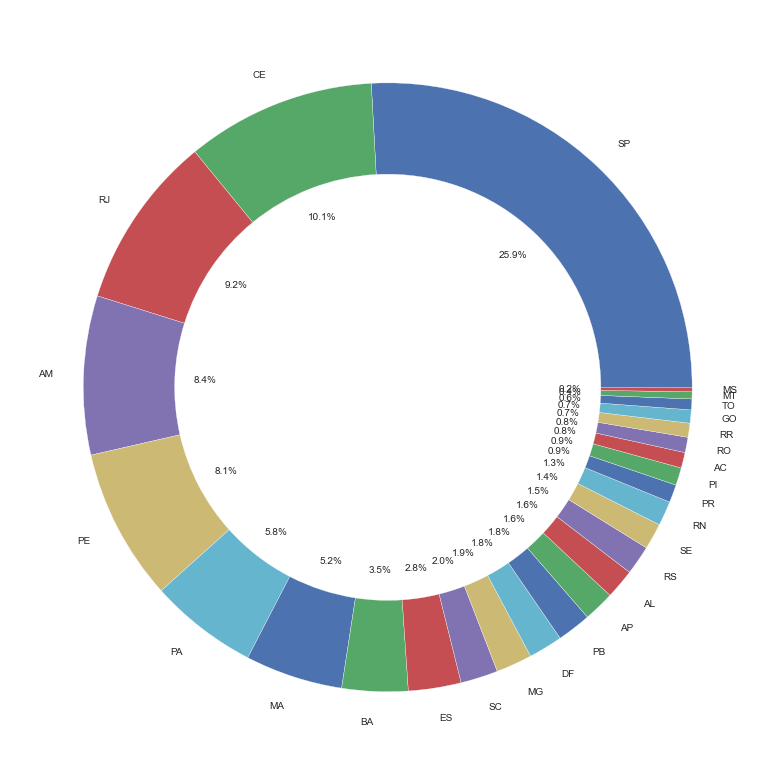

In [52]:
plt.pie(top['casosAcumulado'].values, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), autopct='%2.1f%%', labels=top['estado'].values)
plt.show()

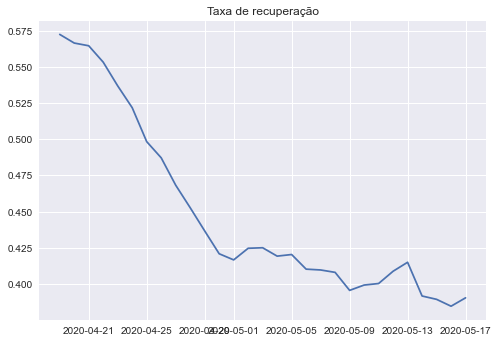

In [156]:
plt.title('Taxa de recuperação')
plt.plot(df[df['regiao'] == 'Brasil']['Recuperadosnovos']
         /df[df['regiao'] == 'Brasil']['casosAcumulado'])
# plt.xticks(np.arange(len(recuperados))[::10], recuperados.index.values[::10])
plt.show()

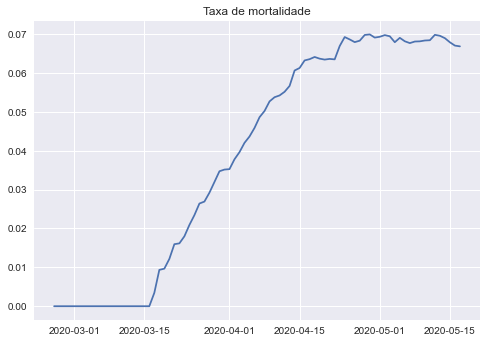

In [147]:
plt.plot(df[df['regiao'] == 'Brasil']['obitosAcumulado']
         /df[df['regiao'] == 'Brasil']['casosAcumulado'])
plt.title('Taxa de mortalidade')
plt.show()

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

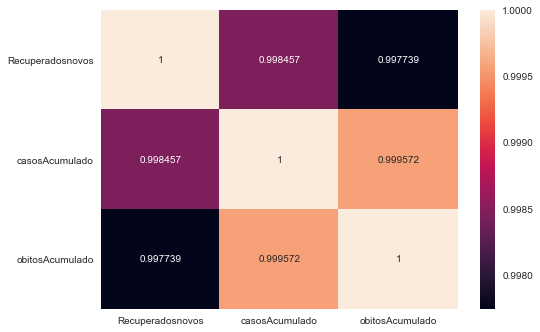

In [157]:

sns.heatmap(df[df['regiao'] == 'Brasil'][['Recuperadosnovos','casosAcumulado', 'obitosAcumulado' ]].corr(), annot=True, fmt='g')
plt.yticks(rotation=0) 

In [155]:
(df[df['regiao'] == 'Brasil']['obitosAcumulado']/df[df['regiao'] == 'Brasil']['casosAcumulado']).max()

0.06993168035618332